<a href="https://colab.research.google.com/github/gustvjor2005/nn-learning/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import sigmoid

<function matplotlib.pyplot.show(*args, **kw)>

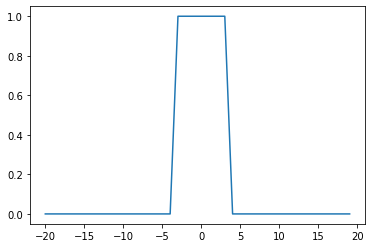

In [ ]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0]).view(-1, 1).type(torch.FloatTensor)
Y[(X[:, 0] > -4) & (X[:, 0] < 4) ] = 1.0
plt.plot(X, Y)
plt.show
#que me funciona?
#X[:, 0] > 18 devuelve los indices
#que corresponden a esa condición

In [ ]:
class Data(Dataset):

  def __init__(self):
    self.x = X
    self.y = Y
    self.len = self.x.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):  
    return self.len

In [ ]:
#criterion
criterion = nn.CrossEntropyLoss()
#dataset
dataset = Data()
dataloader = DataLoader(dataset=dataset, batch_size=1)

In [ ]:
def criterion(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [ ]:
class NN(nn.Module):

  def __init__(self, in_, h_, out_):
    super().__init__()
    self.linear1 = nn.Linear(in_, h_)
    self.linear2 = nn.Linear(h_, out_)
    
    
  def forward(self, x):
    x = sigmoid(self.linear1(x))
    x = sigmoid(self.linear2(x))
    return x

#in
# x (1, 1)
# w (1, 2) -> Trans(tensor([[ 0.3744],[-0.2190]])
#h
# a = (1, 2)
# w = (2, 1)  -> Trans(tensor([[0.2395, 0.6382]])
#out
# a = (1, 1)

model = NN(1, 2, 1)
print(model.state_dict())

OrderedDict([('linear1.weight', tensor([[0.2267],
        [0.0984]])), ('linear1.bias', tensor([0.8121, 0.3067])), ('linear2.weight', tensor([[ 0.0928, -0.1393]])), ('linear2.bias', tensor([0.2295]))])


In [ ]:
#optimizer
optimizer = optim.SGD(model.parameters(), lr=.01)

tensor([[0.2898]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2842]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2794]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2753]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2717]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2685]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2655]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2628]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2602]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2578]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2555]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2534]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2514]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2495]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2479]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([[0.2464]], grad_fn=<SigmoidBackward0>) tensor([[0.]])
tensor([

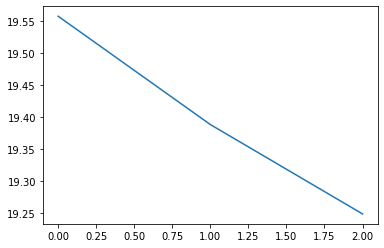

In [ ]:
epochs = 3
COST = []
for i in range(epochs):
  total = 0
  for x, y in dataloader:
    yhat = model(x)
    print(yhat, y)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total += loss.item()

  COST.append(total)
print('cost, ', COST)
plt.plot(COST)
plt.show()